<a href="https://colab.research.google.com/github/yeison34k/diplomado_analisis_datos_machine_learning_python/blob/main/Notebook10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 20**

## **Contenido**

- <a href="#met"> Métricas</a><br>
  - <a href="#acc"> *Accuracy*</a><br>
  - <a href="#mat"> Matriz de confusión</a><br>
  - <a href="#pre"> *Precision* & *Recall*</a><br>
  - <a href="#cur"> Curva ROC</a><br>




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

<p><a name="met"></a></p>

# **Métricas**

Evaluar un clasificador suele ser significativamente más complicado que evaluar un regresor.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.target_names[0]

'malignant'

Entrenemos un par de modelos de clasificación:

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
lr_clf = make_pipeline(StandardScaler(),
                       LogisticRegression())
svm_clf = make_pipeline(StandardScaler(),
                        SVC())

In [ ]:
X = df
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train);

Evaluemos ambos modelos

In [ ]:
lr_clf.score(X_test, y_test)

0.9736842105263158

In [ ]:
svm_clf.score(X_test, y_test)

0.9824561403508771

<p><a name="acc"></a></p>

# **Accuracy**: 

La [métrica](https://scikit-learn.org/stable/modules/model_evaluation.html) que se utiliza por defecto es el *accuracy*, que corresponde a **clasificados Bien/Total**.

Al igual que en el caso de la regresión, podemos obtener las prediciones del modelo y utilizarlos para evaluar el modelo importando directamente la métrica  (o directamente mediante el método `score`, como lo acabamos de hacer).





In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score?

In [ ]:
lr_pred = lr_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, lr_pred), accuracy_score(y_test, svm_pred)

(0.9736842105263158, 0.9824561403508771)

Alternativamente podemos realizar una validación cruzada, que por defecto también utiliza el *accuracy*

In [ ]:
cross_val_score(lr_clf, X, y, cv = 5)

array([0.98245614, 0.98245614, 0.97368421, 0.97368421, 0.99115044])

In [ ]:
cross_val_score(svm_clf, X, y, cv = 5)

array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])

Si evaluamos el rendimiento de un modelo de clasificación utilizando solo la *accuracy* (la fracción de muestras clasificadas correctamente) veremos que, en la práctica, esta métrica de evaluación puede no ser apropiada para el objetivo que se tenga. Es importante elegir la métrica correcta para seleccionar entre diferentes modelos.

Antes de ver las métricas alternativas, veamos las formas en que el *accuracy* puede ser engañoso. Recordemos que para la clasificación binaria, a menudo hablamos de una clase positiva y una clase negativa.

Imaginemos una aplicación para detectar de forma temprana el cáncer mediante una prueba automatizada. Si la prueba es negativa, se supondrá que el paciente está sano, mientras que si la prueba es positiva, el paciente se someterá a una evaluación adicional. Aquí, llamaremos a una prueba positiva (una indicación de cáncer) la clase positiva, y una prueba negativa a la clase negativa. No podemos suponer que nuestro modelo siempre funcionará perfectamente; este cometerá errores. Para cualquier aplicación, debemos preguntarnos cuáles son las consecuencias de estos errores en el mundo real.

Un posible error es que un paciente sano se clasifique como positivo, lo que llevaría a pruebas adicionales. Esto conlleva algunos costos y un inconveniente para el paciente. Una predicción positiva incorrecta se llama *falso positivo*. El otro posible error es que un paciente enfermo se clasifique como negativo, por lo que no recibirá más pruebas ni tratamiento. El cáncer no diagnosticado podría conducir a problemas de salud graves e incluso podría ser fatal. Un error de este tipo (una predicción negativa incorrecta) se llama *falso negativo*.

Ahora, Los conjuntos de datos en los que una clase es mucho más frecuente que la otra se denominan conjuntos de datos no balanceados. En realidad, los datos no balanceados son la norma, y es raro que los eventos de interés tengan una frecuencia igual o incluso similar en los datos.

Veamos que el conjunto de datos que estamos tratando es en efecto desbalanceado:

In [ ]:
print(y.sum(), y.size - y.sum())

357 212


In [ ]:
print(y_train.sum(), y_train.size - y_train.sum())

286 169


construyamos un clasificador *dummy* que clasifique cada instancia como la clase positiva


In [ ]:
y_true_dum = np.array([1 if i < 17 else 0 for i in range(20)])
y_true_dum

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
y_pred_dum = np.ones(20, dtype='int32')
y_pred_dum

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
accuracy_score(y_true_dum, y_pred_dum)

0.85

Vemos que este clasificador nos arroja un buen puntaje. Esto hace que sea muy difícil juzgar si el resultado es realmente útil. El problema aquí es que el accuracy es una medida inadecuada para cuantificar el rendimiento predictivo en este escenario no balanceado, por lo que necesitamos métricas alternativas.

<p><a name="mat"></a></p>

# **Matriz de confusión**

Una de las formas más completas de representar el resultado de evaluar la clasificación binaria es usar matrices de confusión. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
confusion_matrix(y_true_dum, y_pred_dum)

array([[ 0,  3],
       [ 0, 17]])

La salida es una matriz de dos por dos, donde las filas corresponden a las clases verdaderas y las columnas corresponden a las clases predichas. 


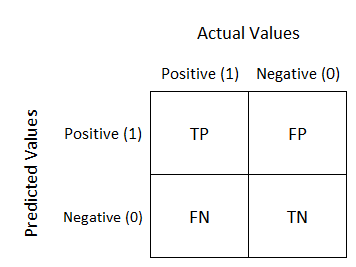

Las entradas en la diagonal principal de la matriz de confusión corresponden a las clasificaciones correctas, mientras que las otras entradas nos dicen cuántas muestras de una clase se clasificaron erróneamente como otra clase.

Podemos relacionar las entradas de la matriz de confusión con los términos falso positivo y falso negativo que presentamos anteriormente. Un clasificador perfecto solo tendría verdaderos positivos y verdaderos negativos, por lo que la matriz de confusión tendría valores distintos de cero solo en su diagonal principal.

Podemos hacer una mejor visualización de la matriz de confusión utilizando la función `plot_confusion_matrix`. Construyamos una función que nos muestre la matriz de confusión dados los valores reales y los predichos por un modelo: 



In [ ]:
from mlxtend.plotting import plot_confusion_matrix

def cm(y_true, y_pred):
  return plot_confusion_matrix(confusion_matrix(y_true, y_pred), cmap = 'Reds')

Utilicemos la función para los dos modelos de clasificación que construimos y para el clasificador *dummy*:

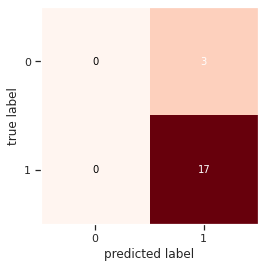

In [ ]:
cm(y_true_dum, y_pred_dum);

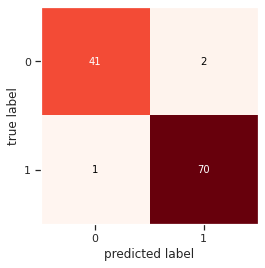

In [ ]:
cm(y_test, lr_pred);

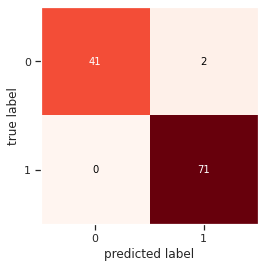

In [ ]:
cm(y_test, svm_pred);

Vemos que los modelos de LR y SVM tienen un mejor rendimiento en todos los aspectos respecto al clasificador *dummy*: tienen más positivos verdaderos y negativos verdaderos mientras que tiene menos falsos positivos y falsos negativos.

La matriz de confusión nos brinda mucha información, pero a veces vamos a querer utilizar una métrica más concreta.

<p><a name="pre"></a></p>

# **Precision & Recall**: 

Inspeccionar la matriz de confusión total es un poco engorroso. Hay otras formas de resumir la matriz de confusión, siendo las más comunes la *precision* y el *recall*. 

La *precision* mide cuántas de las muestras predichas como positivas son realmente positivas: 

$$\text{P} = \frac{TP}{TP + FP}$$

$$\text{P} = \frac{VP}{VP + FP}$$

La *precision* se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos. Utilicemos esta métrica para los tres clasificadores:



In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_true_dum, y_pred_dum)

0.85

In [ ]:
precision_score(y_test, lr_pred)

0.9722222222222222

In [ ]:
precision_score(y_test, svm_pred)

0.9726027397260274

Una forma trivial de tener una *precision* perfecta es hacer una sola predicción positiva y asegurarse de que sea correcta (*precision* = 1/1 = 100%). Esto no sería muy útil ya que el clasificador ignoraría todas las instancias positivas menos una. Por lo tanto, la *precision* se usa normalmente junto con otra métrica llamada *recall*

Esta mide la proporción de clases positivas clasificadas correctamente:

$$\text{R} = \frac{TP}{TP+FN}$$
$$\text{R} = \frac{VP}{VP+FN}$$

El *recall* se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.


In [ ]:
recall_score(y_true_dum, y_pred_dum)

1.0

In [ ]:
recall_score(y_test, lr_pred)

0.9859154929577465

In [ ]:
recall_score(y_test, svm_pred)

1.0

#**$F$ Metric**
Con frecuencia hay tensión entre la *precision* y el *recall*. Esto quiere decir que, al mejorar la *precision*, generalmente se reduce el *recall*, y viceversa. Por lo tanto, si bien la *precision* y el *recall* son medidas muy importantes, mirar solo una de ellas no proporcionará una imagen completa del problema. Una forma de resumirlos es el *puntaje f* o la *medida f*, que es la media armónica entre *precision* y *recall*

$$\text{f1} = 2 \frac{P*R}{P+R}$$

Mientras que la media trata todos los valores por igual, la media armónica da mucho más peso a los valores bajos. Como resultado, el clasificador solo obtendrá una puntuación F1 alta si tanto el *recall* como la *precision* son altas. Como tiene en cuenta la *precision* y el *recall*, esta puede ser una mejor medida que la *accuracy* en los conjuntos de datos de clasificación binaria no balanceados.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_true_dum, y_pred_dum)

0.9189189189189189

In [ ]:
f1_score(y_test, lr_pred)

0.979020979020979

In [ ]:
f1_score(y_test, svm_pred)

0.9861111111111112

Si queremos un resumen más completo de *precision*, *recall* y puntaje f, podemos usar la función `classification_report` para calcular los tres a la vez 

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_dum, y_pred_dum))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



El puntaje f favorece a los clasificadores que tienen una *precision* y un *recall* similares. Esto no siempre es lo que deseamos: en algunos contextos, lo que más importa es la *precision*, y en otros contextos, realmente importa es el *recall*. Desafortunadamente, no podemos tener las dos cosas: aumentar la *precision* reduce el *recall* y viceversa. Esto se denomina compensación de *precision*/*recall*.


Para comprender esta compensación, recordemos cómo los modelos toman sus decisiones de clasificación. Para cada instancia, se calcula una puntuación basada en una función de decisión, y si esa puntuación es mayor que un umbral, asigna la instancia a la clase positiva o, de lo contrario, la asigna a la clase negativa.

In [ ]:
lr_clf.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [ ]:
lr_clf.decision_function(X_test)

array([  2.04728073, -11.61392569,  -5.77378482,   7.57870279,
         9.70649132, -23.06567557, -20.27168162,  -3.31281742,
         0.48655175,   7.17535158,   2.94477792,  -4.37555516,
         5.09850878,  -1.768838  ,   6.41771734,  -7.17950628,
         6.28487423,  11.38897714,  14.00314398, -13.6819349 ,
         2.3840794 ,   4.61757595, -19.2343191 ,   9.43958918,
         6.76938887,   7.44939701,   6.82447154,   5.10103047,
         5.85024439, -11.72170476,   7.56178459,   8.80890154,
         6.11365994,   5.19486672,   8.85865079,   6.00962733,
        -2.79024911,   5.82142916,  -9.31974505,   2.97989307,
         9.53828961,  -7.81133713,   5.99536086,   6.93439865,
         3.88154364,   2.54658098,   7.80947494,   7.60467735,
         3.44912852,   7.39456363,  -9.02384345, -16.73573683,
         0.80363685,   4.30701089,  10.49873152,   4.63063476,
         9.07907833, -25.60640198,  -1.63368407,   8.86911142,
         5.28693079, -14.61037882, -20.36438644,   3.43

In [ ]:
lr_clf.predict_proba(X_test)

In [ ]:
y_pred_lower = lr_clf.decision_function(X_test)> - 0.8

In [ ]:
y_pred_lower

array([ True, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True, False])

El hacer predicciones puede verse como fijar el umbral para la salida de la función de decisión en un cierto punto fijo. En clasificación binaria usamos 0 (y 0.5 para `predict_proba`)

Supongamos que en nuestra aplicación es más importante tener un alto *recall* para la clase 1. Esto significa que estamos dispuestos a arriesgar más falsos positivos a cambio de más positivos verdaderos. Por defecto, los puntos con un valor de función de decisión mayor que 0 se clasificarán como clase 1. Queremos que se clasifiquen más puntos como clase 1, por lo que debemos disminuir el umbral:

Scikit-Learn no nos permite establecer el umbral directamente, pero nos da acceso a los puntajes de decisión que utiliza para hacer las predicciones. En lugar de llamar al método `predict` del clasificador, podemos llamar al método `decision_function`, que devuelve una puntuación para cada instancia, y luego hacer predicciones basadas en esas puntuaciones utilizando cualquier umbral que deseemos:

In [ ]:
print(classification_report(y_test, y_pred_lower))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Entonces, ¿cómo podemos decidir qué umbral usar? Para esto, primero debemos obtener las puntuaciones de todas las instancias en el conjunto de entrenamiento utilizando la función `cross_val_predict`

In [ ]:
from sklearn.model_selection import cross_val_predict

cross_val_predict?

In [ ]:
y_scores = cross_val_predict(lr_clf, X, y, cv = 5, method= 'decision_function')
y_scores

Ahora, con estos puntajes, podemos calcular la precisión y el recall para todos los umbrales posibles utilizando la función `precision_recall_curve` 

In [ ]:
from sklearn.metrics import precision_recall_curve

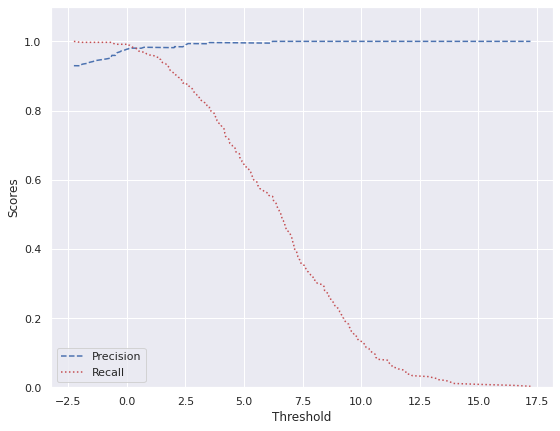

In [ ]:
precision, recall, thresholds = precision_recall_curve(y, y_scores)

plt.figure(figsize=(9, 7))
plt.plot(thresholds, precision[: -1], 'b--', label = 'Precision')
plt.plot(thresholds, recall[: -1], 'r:', label = 'Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Scores')
plt.ylim(0,1.1);

Ahora, podemos seleccionar el valor de umbral que nos brinde la mejor compensación de *precision*/*recall* para nuestra tarea. Otra forma de seleccionar una buena compensación de *precision*/*recall* es graficar la *precision* directamente contra el *recall*:



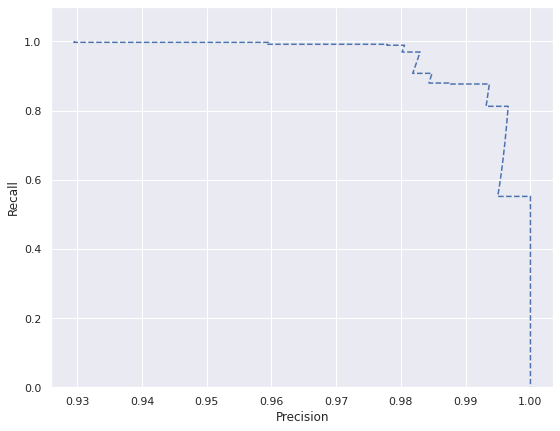

In [ ]:
plt.figure(figsize=(9, 7))
plt.plot(precision, recall, 'b--', label = 'Precision')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.ylim(0,1.1);

<p><a name="cur"></a></p>

# **Curva ROC**

Esta curva es otra herramienta común utilizada con clasificadores binarios. Es muy similar a la curva de *precision*-*recall*, pero en lugar de graficar la *precision* frente al *recall*, la curva ROC grafica la tasa de verdaderos positivos (otro nombre para el *recall*) frente a la tasa de falsos positivos (FPR). El FPR es la proporción de instancias negativas que se clasifican incorrectamente como positivas (se obtiene conjugando los boleanos de la definición del recall). Es igual a uno menos la tasa negativa verdadera, que es la proporción de instancias negativas que se clasifican correctamente como negativas.

In [ ]:
from sklearn.metrics import roc_curve
roc_curve?

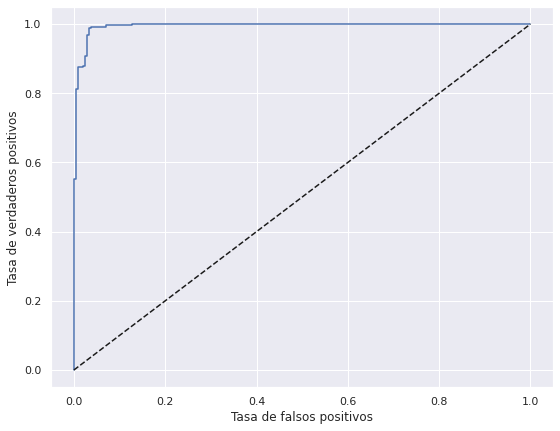

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr, label = 'ROC_curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos');

Una vez más, hay una compensación: cuanto mayor es el *recall* (TPR), más falsos positivos (FPR) produce el clasificador. La línea punteada representa la curva ROC de un clasificador puramente aleatorio; un buen clasificador permanece lo más lejos posible de esa línea (hacia la esquina superior izquierda).

Una forma de comparar clasificadores es medir el área bajo la curva (AUC). Un clasificador perfecto tendrá un ROC AUC igual a 1, mientras que un clasificador puramente aleatorio tendrá un ROC AUC igual a 0,5. Scikit-Learn proporciona una función para calcular el AUC de la ROC:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score?

In [ ]:
roc_auc_score(y, y_scores)

0.9941995666191005

In [ ]:
svm_y_scores = cross_val_predict(svm_clf, X, y, cv = 5, method= 'decision_function')

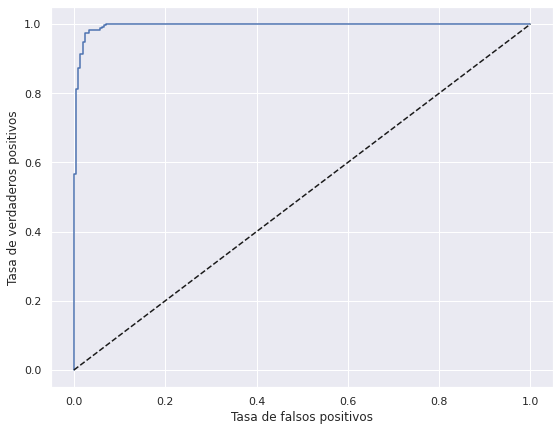

In [ ]:
fpr, tpr, thresholds = roc_curve(y, svm_y_scores)

plt.figure(figsize=(9, 7))
plt.plot(fpr, tpr, label = 'ROC_curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos');

In [ ]:
roc_auc_score(y, svm_y_scores)

0.9950848263833835